Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/fruit_classification'

/content/drive/MyDrive/fruit_classification


In [ ]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [ ]:
#Fetch Images count from Fodlers
count = 0
dirs = os.listdir('fruits-360/Training/')
for dir in dirs:
    files = list(os.listdir('fruits-360/Training/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Training Folder has '+ str(count) + ' Images')

Blueberry 1 Folder has 462 Images
Carambula 1 Folder has 490 Images
Apple Pink Lady 1 Folder has 456 Images
Avocado ripe 1 Folder has 491 Images
Apple Golden 2 Folder has 249 Images
Cantaloupe 2 Folder has 492 Images
Apple Red Yellow 1 Folder has 492 Images
Apple Red 1 Folder has 492 Images
Apricot 1 Folder has 492 Images
Apple Braeburn 1 Folder has 492 Images
Banana Red 1 Folder has 490 Images
Banana Lady Finger 1 Folder has 450 Images
Cantaloupe 1 Folder has 492 Images
Apple Crimson Snow 1 Folder has 444 Images
Avocado 1 Folder has 427 Images
Apple Red Yellow 2 Folder has 672 Images
Apple Golden 3 Folder has 481 Images
Banana 1 Folder has 490 Images
Cactus fruit 1 Folder has 490 Images
Apple 6 Folder has 473 Images
Cocos 1 Folder has 490 Images
Fig 1 Folder has 702 Images
Grape White 1 Folder has 490 Images
Huckleberry 1 Folder has 490 Images
Cherry Wax Red 1 Folder has 492 Images
Kumquats 1 Folder has 490 Images
Kiwi 1 Folder has 466 Images
Cherry Wax Black 1 Folder has 492 Images
C

In [ ]:
count = 0
dirs = os.listdir('fruits-360/Test/')
for dir in dirs:
    files = list(os.listdir('fruits-360/Test/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Testing Folder has '+ str(count) + ' Images')

Apple Granny Smith 1 Folder has 164 Images
Apple Golden 1 Folder has 160 Images
Apple Red 3 Folder has 144 Images
Apple Golden 2 Folder has 164 Images
Apple Red 2 Folder has 164 Images
Apple Golden 3 Folder has 161 Images
Apple Red Delicious 1 Folder has 166 Images
Apple 6 Folder has 157 Images
Pear Forelle 1 Folder has 234 Images
Nectarine Flat 1 Folder has 160 Images
Granadilla 1 Folder has 166 Images
Peach Flat 1 Folder has 164 Images
Blueberry 1 Folder has 154 Images
Cucumber 3 Folder has 81 Images
Grape White 4 Folder has 158 Images
Potato Sweet 1 Folder has 150 Images
Dates 1 Folder has 166 Images
Papaya 1 Folder has 164 Images
Hazelnut 1 Folder has 157 Images
Cabbage white 1 Folder has 47 Images
Plum 3 Folder has 304 Images
Cucumber Ripe 1 Folder has 130 Images
Pear Abate 1 Folder has 166 Images
Cherry 1 Folder has 164 Images
Grapefruit White 1 Folder has 164 Images
Pitahaya Red 1 Folder has 166 Images
Eggplant long 1 Folder has 80 Images
Maracuja 1 Folder has 166 Images
Apple h

In [ ]:
train = 'fruits-360/Training/'
validation = 'fruits-360/Test/'
img_size = 180
batch = 4

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory( train,
                                                       seed = 123,
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( validation,
                                                       seed = 123,
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 49770 files belonging to 105 classes.
Found 23619 files belonging to 141 classes.


In [ ]:
fruit_names = train_ds.class_names
fruit_names

['Apple 6',
 'Apple Braeburn 1',
 'Apple Crimson Snow 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Pink Lady 1',
 'Apple Red 1',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot 1',
 'Avocado 1',
 'Avocado ripe 1',
 'Banana 1',
 'Banana Lady Finger 1',
 'Banana Red 1',
 'Blueberry 1',
 'Cactus fruit 1',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula 1',
 'Cherry 2',
 'Cherry Rainier 1',
 'Cherry Wax Black 1',
 'Cherry Wax Red 1',
 'Cherry Wax Yellow 1',
 'Chestnut 1',
 'Clementine 1',
 'Cocos 1',
 'Corn 1',
 'Corn Husk 1',
 'Cucumber 1',
 'Cucumber Ripe 2',
 'Eggplant long 1',
 'Fig 1',
 'Grape Blue 1',
 'Grape Pink 1',
 'Grape White 1',
 'Grape White 3',
 'Grapefruit Pink 1',
 'Grapefruit White 1',
 'Guava 1',
 'Huckleberry 1',
 'Kaki 1',
 'Kiwi 1',
 'Kohlrabi 1',
 'Kumquats 1',
 'Lemon 1',
 'Lemon Meyer 1',
 'Limes 1',
 'Lychee 1',
 'Mandarine 1',
 'Mango 1',
 'Mango Red 1',
 'Mangostan 1',
 'Melon Piel de Sapo 1',
 'Mulberry 1',
 'Nectarine 1',
 'Nut Forest 1',
 'Onion Re

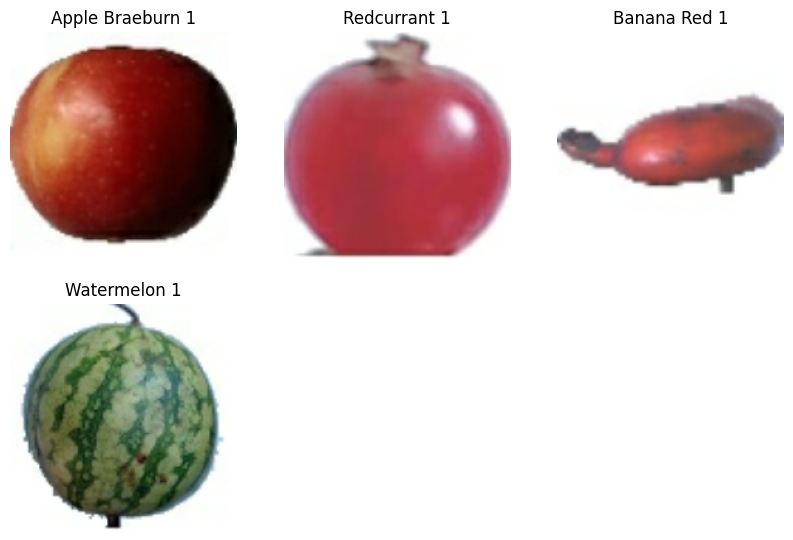

In [ ]:
import matplotlib.pyplot as plt

i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(4):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(fruit_names[labels[i]])
        plt.axis('off')

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [ ]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [ ]:
#Data Augmentation
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.7),
    layers.RandomZoom(0.1)
])

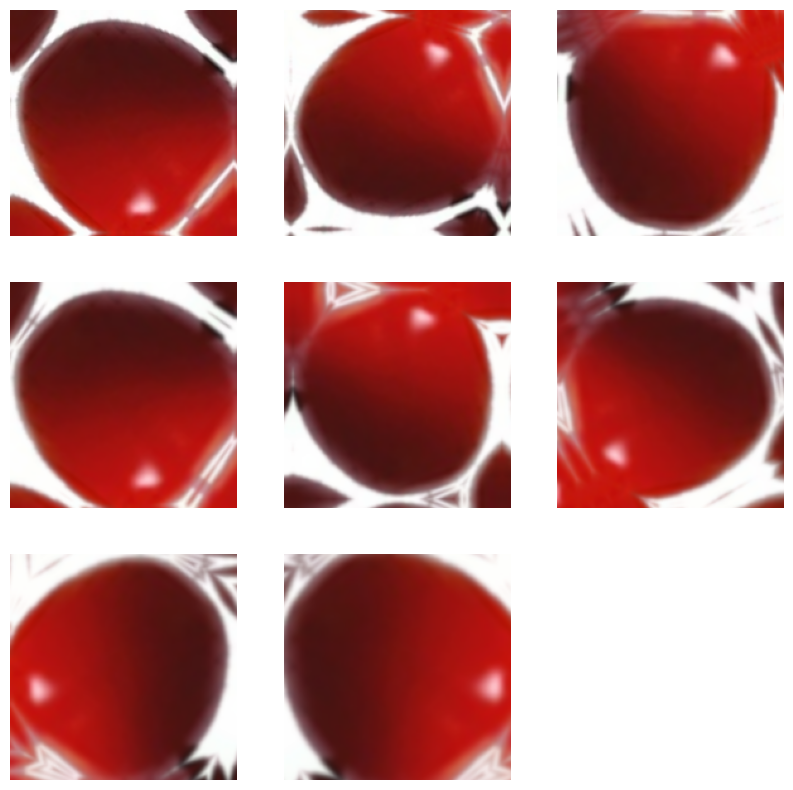

In [ ]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(8):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [ ]:
#MOdel Creation
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(141)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [ ]:
model_training = model.fit(train_ds, epochs=5, validation_data=val_ds)

Epoch 1/5
12443/12443 [==============================] - 591s 47ms/step - loss: 0.7633 - accuracy: 0.7703 - val_loss: 31.1785 - val_accuracy: 0.0214
Epoch 2/5
12443/12443 [==============================] - 468s 38ms/step - loss: 0.2249 - accuracy: 0.9314 - val_loss: 45.3341 - val_accuracy: 0.0214
Epoch 3/5
12443/12443 [==============================] - 466s 37ms/step - loss: 0.1860 - accuracy: 0.9468 - val_loss: 52.8207 - val_accuracy: 0.0255
Epoch 4/5
12443/12443 [==============================] - 466s 37ms/step - loss: 0.1742 - accuracy: 0.9533 - val_loss: 63.6826 - val_accuracy: 0.0207
Epoch 5/5
12443/12443 [==============================] - 464s 37ms/step - loss: 0.1722 - accuracy: 0.9586 - val_loss: 75.3276 - val_accuracy: 0.0243


In [ ]:
model.save('fruit_classifier.h5')
print("Success")

Success


In [ ]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + fruit_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [ ]:
classify_images('sample/r_96_100.jpg')

1/1 [==============================] - 0s 30ms/step


'The Image belongs to Blueberry 1 with a score of 100.0'